In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\mdine\Downloads\projects\SUV_dataset\suv_data.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data[data.duplicated()] # zero duplicates in my data

,User ID,Gender,Age,EstimatedSalary,Purchased


In [7]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: >

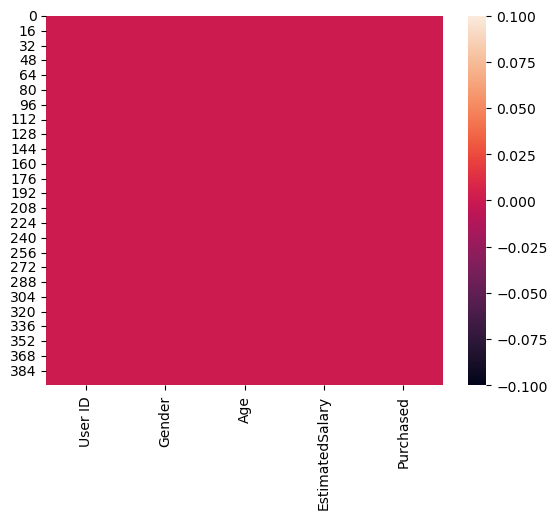

In [8]:
sns.heatmap(data.isnull())

# Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

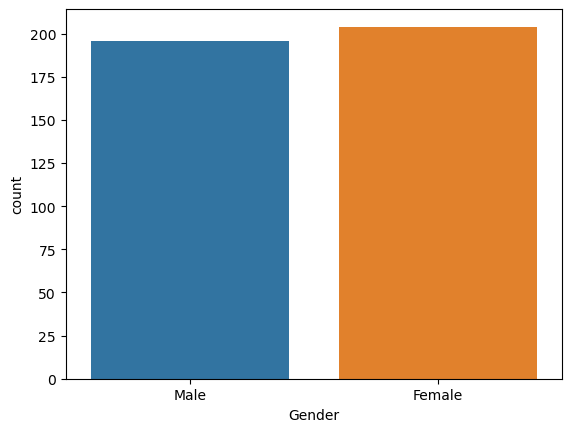

In [9]:
sns.countplot(x="Gender",data=data)

<Axes: xlabel='Gender', ylabel='count'>

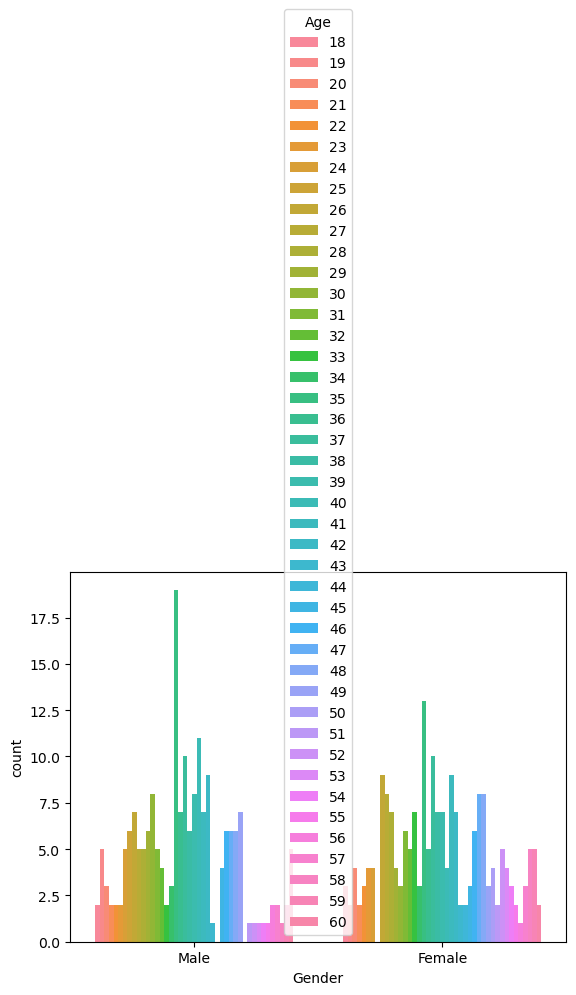

In [10]:
sns.countplot(x="Gender",hue='Age',data=data,width=0.8,saturation=1.75)

<Axes: xlabel='Gender', ylabel='count'>

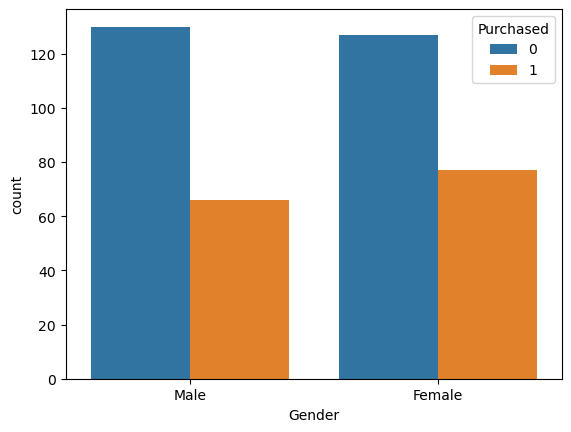

In [11]:
sns.countplot(x="Gender",hue='Purchased',data=data)

<Axes: ylabel='Frequency'>

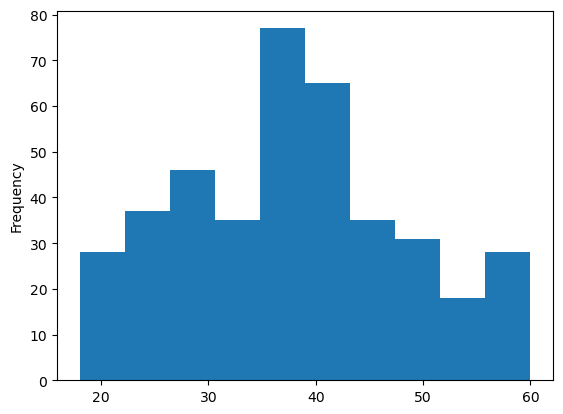

In [12]:
data['Age'].plot.hist()

# Logistic Regression

In [13]:
data=data=pd.get_dummies(data)
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [14]:
# using iloc i removed 'User Id',"Purchased"
X=data.iloc[:,[1,2,4,5]].values
X

array([[   19, 19000,     0,     1],
       [   35, 20000,     0,     1],
       [   26, 43000,     1,     0],
       ...,
       [   50, 20000,     1,     0],
       [   36, 33000,     0,     1],
       [   49, 36000,     1,     0]], dtype=int64)

In [15]:
# using iloc i olny take target column apart from that i removed eveything
y=data.iloc[:,[3]].values
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually. By default, Sklearn train_test_split will make random partitions for the two subsets

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =2)

The sklearn. preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators. In general, learning algorithms benefit from standardization of the data set.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

it measures the relationship between the categorical dependent variable and one or more independent variables by estimating the probability of occurrence of an event using its logistics function. sklearn. linear_model. LogisticRegression is the module used to implement logistic regression.

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [21]:
logreg.fit(X_train,y_train)

C:\Users\mdine\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# train the model

In [22]:
Train_prediction=logreg.predict(X_train)

The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes

In [23]:
from sklearn.metrics import classification_report

In [24]:
classification_report(y_train,Train_prediction)

'              precision    recall  f1-score   support\n\n           0       0.85      0.92      0.88       180\n           1       0.83      0.70      0.76       100\n\n    accuracy                           0.84       280\n   macro avg       0.84      0.81      0.82       280\nweighted avg       0.84      0.84      0.84       280\n'

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_train,Train_prediction)

array([[166,  14],
       [ 30,  70]], dtype=int64)

The accuracy_score() method of sklearn. metrics, accept the true labels of the sample and the labels predicted by the model as its parameters and computes the accuracy score as a float value, which can likewise be used to obtain the accuracy score in Python.

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_train,Train_prediction)

0.8428571428571429

# test the model

In [29]:
Test_prediction=logreg.predict(X_test)

In [30]:
classification_report(y_test,Test_prediction)

'              precision    recall  f1-score   support\n\n           0       0.85      0.92      0.88        77\n           1       0.83      0.70      0.76        43\n\n    accuracy                           0.84       120\n   macro avg       0.84      0.81      0.82       120\nweighted avg       0.84      0.84      0.84       120\n'

In [31]:
confusion_matrix(y_test,Test_prediction)

array([[71,  6],
       [13, 30]], dtype=int64)

In [32]:
accuracy_score(y_test,Test_prediction)*100

84.16666666666667